Name : Shaqeeq S
Roll No : 24BAD109

SCENARIO 1: 
Predict ocean water temperature using environmental and depth-related features.
Dataset (Kaggle – Public):
https://www.kaggle.com/datasets/sohier/calcofi
Target Variable:
Water Temperature (T_degC)
Sample Input Features
Depth (m)
Salinity
Oxygen
Latitude
Longitude

IN-LAB TASKS
•Import necessary Python libraries (NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn).
•Load the CalCOFI dataset into a Pandas DataFrame
•Select relevant numerical features and target variable.
•Handle missing values using mean/median imputation.
•Perform feature scaling using StandardScaler.
•Split the dataset into training and testing sets.
•Train a Linear Regression model using Scikit-learn.
•Predict water temperature for test data.
•Evaluate model performance using:
– Mean Squared Error (MSE)
– Root Mean Squared Error (RMSE)
– R² Score
•Visualize:
– Actual vs Predicted temperature
– Residual errors
•Optimize model performance using:
– Feature selection
– Regularization (Ridge / Lasso)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, roc_curve, auc)

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, roc_curve, auc)

C:\Users\HP\AppData\Local\Temp\ipykernel_820\3766212927.py:3: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  bottle = pd.read_csv("C:\\Users\\HP\\Documents\\archive(11)\\bottle.csv")
C:\Users\HP\AppData\Local\Temp\ipykernel_820\3766212927.py:4: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  cast = pd.read_csv('C:\\Users\\HP\\Documents\\archive(11)\\cast.csv')


--- Linear Regression Results ---
MSE: 4.6940
RMSE: 2.1666
R² Score: 0.7275


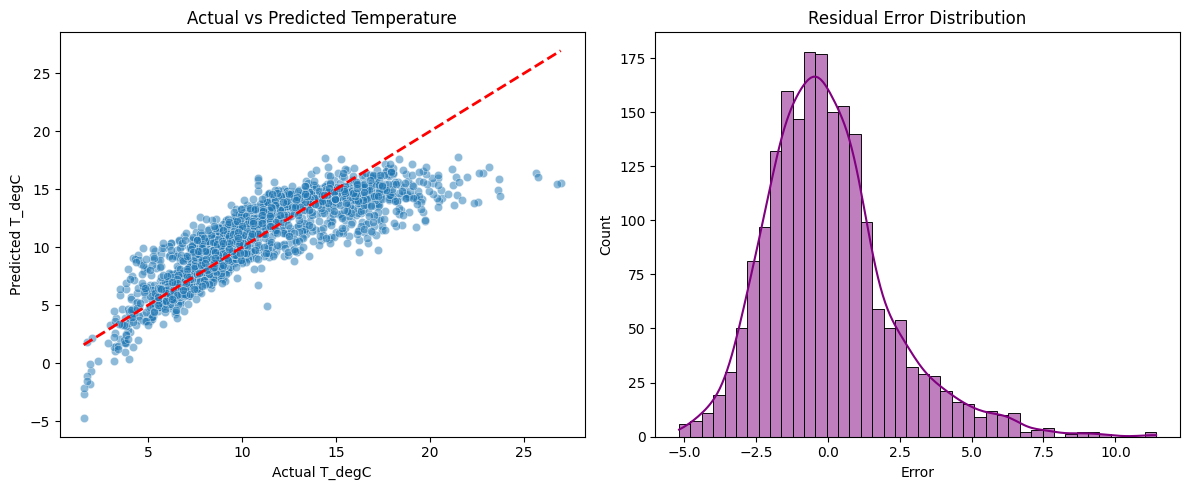


--- Optimization Results ---
Ridge R²: 0.7275
Lasso R²: 0.7245


In [6]:
# 1. Load the datasets
# Note: Use nrows if your machine struggles with the full 800k+ rows
bottle = pd.read_csv("C:\\Users\\HP\\Documents\\archive(11)\\bottle.csv")
cast = pd.read_csv('C:\\Users\\HP\\Documents\\archive(11)\\cast.csv')

# 2. Select relevant columns and Merge
# We need Lat/Lon from 'cast' and Temp/Depth/Salinity/O2 from 'bottle'
bottle_df = bottle[['Cst_Cnt', 'T_degC', 'Depthm', 'Salnty', 'O2ml_L']]
cast_df = cast[['Cst_Cnt', 'Lat_Dec', 'Lon_Dec']]

# Merge on Cast Count
df = pd.merge(bottle_df, cast_df, on='Cst_Cnt')

# To keep the lab running fast, we'll take a representative sample
df = df.sample(n=10000, random_state=42)

# 3. Handle Missing Values
# Imputing with mean as requested
df['T_degC'] = df['T_degC'].fillna(df['T_degC'].mean())
df['Salnty'] = df['Salnty'].fillna(df['Salnty'].mean())
df['O2ml_L'] = df['O2ml_L'].fillna(df['O2ml_L'].mean())

# 4. Feature Selection
X = df[['Depthm', 'Salnty', 'O2ml_L', 'Lat_Dec', 'Lon_Dec']]
y = df['T_degC']

# 5. Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 7. Predictions and Evaluation
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"--- Linear Regression Results ---")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# 8. Visualization
plt.figure(figsize=(12, 5))

# Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Actual T_degC')
plt.ylabel('Predicted T_degC')

# Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residual Error Distribution')
plt.xlabel('Error')

plt.tight_layout()
plt.show()

# 9. Optimization: Regularization (Ridge/Lasso)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)

print(f"\n--- Optimization Results ---")
print(f"Ridge R²: {r2_score(y_test, ridge_pred):.4f}")
print(f"Lasso R²: {r2_score(y_test, lasso_pred):.4f}")

SCENARIO 2: 
Classify whether LIC stock price will increase (1) or decrease (0) based on historical data.
Dataset (Kaggle – Public):
https://www.kaggle.com/datasets/debashis74017/lic-stock-price-data
Target Variable (Derived):
• Price Movement
– 1 → Closing price > Opening price
– 0 → Closing price ≤ Opening price
Input Features:
• Open
• High
• Low
• Volume

IN-LAB TASKS (Logistic Regression)
•Import required Python libraries.
•Load LIC stock dataset into Pandas.
•Create a binary target variable (Price Movement).
•Handle missing values.
•Perform feature scaling.
•Split the dataset into training and testing sets.
•Train a Logistic Regression model.
•Predict stock movement for test data.
•Evaluate classification performance using:
– Accuracy
– Precision
– Recall
– F1-Score
– Confusion Matrix
•Visualize:
– ROC Curve
– Feature importance
•Optimize model using:
– Hyperparameter tuning (C, penalty)
– Regularization

--- Classification Metrics ---
Accuracy:  0.8000
Precision: 0.0000
Recall:    0.0000
F1-Score:  0.0000


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


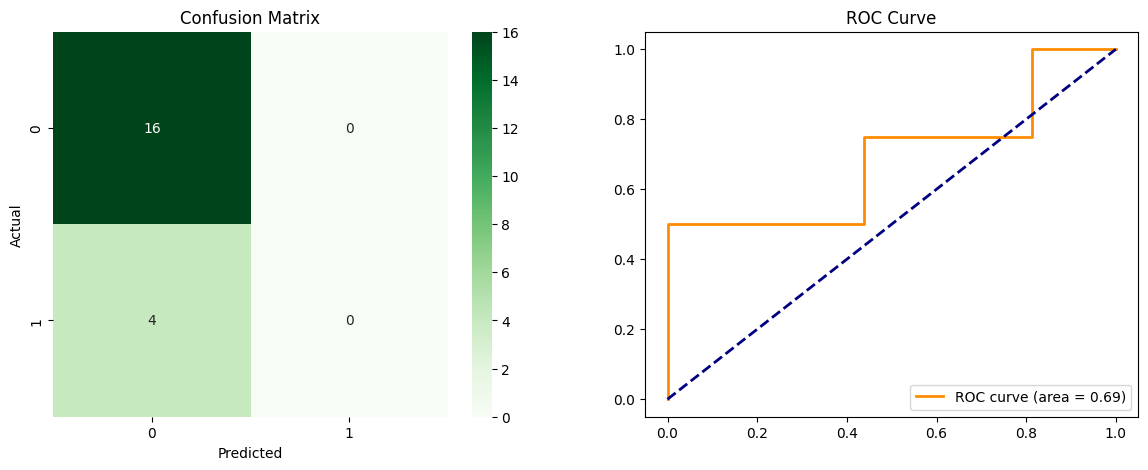


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Optimized Accuracy: 0.8458


C:\Users\HP\AppData\Local\Temp\ipykernel_30576\1615939940.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=X.columns, palette='viridis')


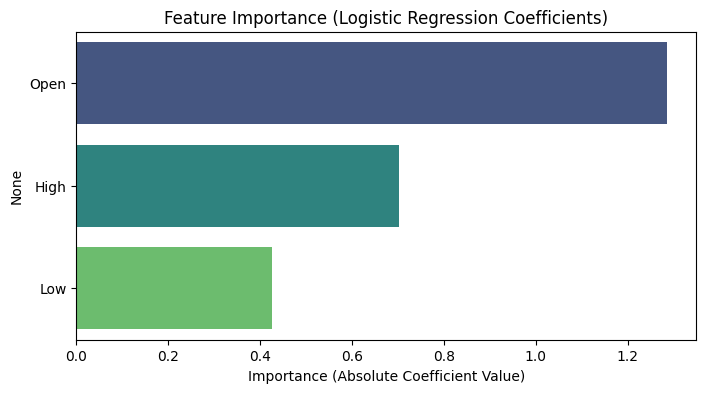

In [2]:


# 1. Load the LIC dataset
# Note: Using the file name provided in the dataset snippet
df = pd.read_csv(r"C:\Users\HP\Downloads\archive(12)\LICI - Daily data.csv") #

# 2. Create Binary Target Variable (Price Movement)
# 1 if Closing price > Opening price, else 0
df['Price_Movement'] = np.where(df['Close'] > df['Open'], 1, 0) #

# 3. Select Features and Target
# Note: Volume is listed in the scenario but is missing from the provided CSV columns
# We will use the available numerical features: Open, High, Low
X = df[['Open', 'High', 'Low']] #
y = df['Price_Movement']

# 4. Handle Missing Values
# Imputing missing numerical values with the median to avoid outliers
X = X.fillna(X.median())

# 5. Split and Scale
# Splitting 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling is crucial for Logistic Regression to ensure all prices are on the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Logistic Regression Model
# Initializing with a higher max_iter to ensure convergence
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# 7. Predictions
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1] # Required for ROC Curve


# 8. Evaluate Classification Performance
print("--- Classification Metrics ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")

# 9. Visualization: Confusion Matrix & ROC Curve
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax[0])
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
ax[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_title('ROC Curve')
ax[1].legend(loc="lower right")
plt.show()

# 10. Optimization: Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] # liblinear supports both l1 and l2
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Optimized Accuracy: {grid_search.best_score_:.4f}")

# 11. Feature Importance
# Using the absolute value of coefficients to determine which feature drives the prediction
importance = np.abs(log_reg.coef_[0])
plt.figure(figsize=(8, 4))
sns.barplot(x=importance, y=X.columns, palette='viridis')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Importance (Absolute Coefficient Value)')
plt.show()

In [10]:
final_output = X_test.copy().reset_index(drop=True)
final_output['Actual_Movement'] = y_test.values
final_output['Predicted_Movement'] = y_pred

# 10. Print the final combined table
print("--- LIC Stock Movement: Input Features vs Predictions ---")
print(final_output.to_string())

--- LIC Stock Movement: Input Features vs Predictions ---
      Open    High     Low  Actual_Movement  Predicted_Movement
0   683.25  687.10  681.05                0                   0
1   718.70  724.40  714.35                0                   0
2   623.90  626.90  618.00                0                   0
3   713.00  719.75  708.05                0                   0
4   655.00  656.75  651.60                0                   0
5   664.70  678.00  662.20                0                   0
6   702.00  704.00  697.00                0                   0
7   720.10  721.25  709.00                0                   0
8   810.00  822.00  810.00                1                   0
9   872.00  918.95  860.00                1                   0
10  660.10  696.85  657.80                1                   0
11  671.00  672.90  664.00                0                   0
12  688.00  693.00  687.05                0                   0
13  666.00  684.90  664.10                1   